In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("train.csv") ## Pre EDA
df = df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
len(df)

8523

C:\Users\Daryl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


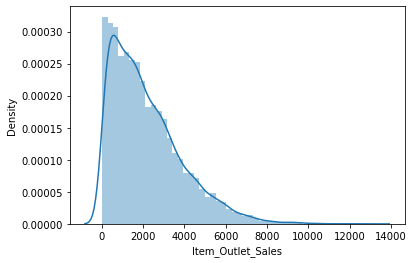

In [5]:
sns.distplot(df['Item_Outlet_Sales'])
df = df[df['Item_Outlet_Sales']<5000]

In [6]:
X = df.drop('Item_Outlet_Sales',axis=1).values
y = df['Item_Outlet_Sales'].values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7894 entries, 0 to 8522
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Weight             7894 non-null   float64
 1   Item_Visibility         7894 non-null   float64
 2   Item_MRP                7894 non-null   float64
 3   Item_Outlet_Sales       7894 non-null   float64
 4   Outlet_Years            7894 non-null   int64  
 5   Item_Fat_Content_0      7894 non-null   int64  
 6   Item_Fat_Content_1      7894 non-null   int64  
 7   Outlet_Location_Type_0  7894 non-null   int64  
 8   Outlet_Location_Type_1  7894 non-null   int64  
 9   Outlet_Location_Type_2  7894 non-null   int64  
 10  Outlet_Size_0           7894 non-null   int64  
 11  Outlet_Size_1           7894 non-null   int64  
 12  Outlet_Size_2           7894 non-null   int64  
 13  Outlet_Size_3           7894 non-null   int64  
 14  Outlet_Type_0           7894 non-null   

In [8]:
## Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [11]:
## Scaling Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,X_test.shape

((5920, 30), (1974, 30))

In [15]:
## Creating the model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [17]:
X_train.shape

(5920, 30)

In [18]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

NameError: name 'Sequential' is not defined

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

ModuleNotFoundError: No module named 'tensorflow'

In [379]:
## Training

In [380]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          batch_size=64,
          validation_data=(X_test, y_test), verbose=0,
          callbacks=[early_stop]
          )

Epoch 00069: early stopping


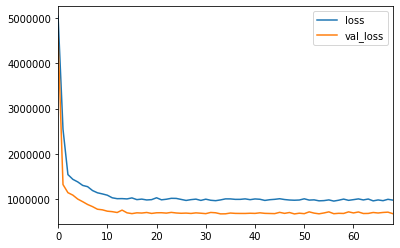

In [381]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [382]:
## Evaluation

In [383]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [384]:
predictions = model.predict(X_test)

In [385]:
np.sqrt(mean_squared_error(y_test,predictions))

828.2628710400064

In [386]:
df['Item_Outlet_Sales'].mean()

1858.4061952875675

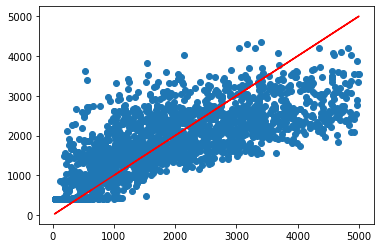

In [387]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')